In [85]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import preprocessor as p


import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


In [87]:
df=pd.read_csv("/Tweets.csv")
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [88]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [89]:
df1=df[['text','airline_sentiment']]

In [42]:
df1.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [90]:
df1.dropna(subset=['text','airline_sentiment'],inplace=True)
print(f"shape of  data:{df1.shape}")

shape of  data:(14640, 2)


In [92]:
def preprocessing_text(row):
  text=row['text']
  text=p.clean(text)
  text=text.lower()
  return text

In [93]:
df1['text'] = df1.apply(preprocessing_text, axis=1)

In [94]:
df1

,text,airline_sentiment
0,what said.,neutral
1,plus you've added commercials to the experienc...,positive
2,i didn't today... must mean i need to take ano...,neutral
3,"it's really aggressive to blast obnoxious ""ent...",negative
4,and it's a really big bad thing about it,negative
...,...,...
14635,thank you we got on a different flight to chic...,positive
14636,leaving over minutes late flight. no warnings ...,negative
14637,please bring american airlines to,neutral
14638,"you have my money, you change my flight, and d...",negative


In [148]:
df1.loc[10]

text                 did you know that suicide is the second leadin...
airline_sentiment                                              neutral
Name: 10, dtype: object

In [146]:
df1.loc[10]['text']



'did you know that suicide is the second leading cause of death among teens -24'

In [96]:
#Library for building wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [97]:
heading_neutral=df1[df1['airline_sentiment']=='neutral']["text"]
collapsed_heading_neutral=heading_neutral.str.cat(sep=' ')

heading_positive=df1[df1['airline_sentiment']=='positive']["text"]
collapsed_heading_positive=heading_positive.str.cat(sep=' ')

heading_negative=df1[df1['airline_sentiment']=='negative']["text"]
collapsed_heading_negative=heading_negative.str.cat(sep=' ')


**Create stopword list:**

In [98]:
stopwords = set(STOPWORDS)
stopwords.update(["https","t","tu","via"])


Word Cloud for Tweets : neutral


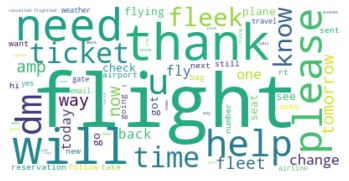

Word Cloud for Tweets : positive


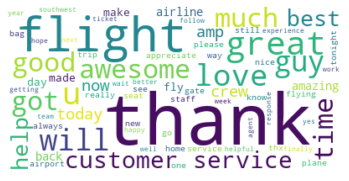

Word Clound for Tweets : negative


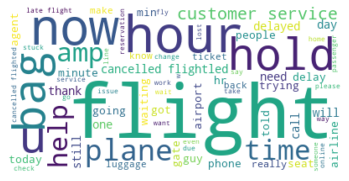

In [99]:
# Generate a word cloud image
print("Word Cloud for Tweets : neutral")
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=70).generate(collapsed_heading_neutral)
# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



# Generate a word cloud image
print("Word Cloud for Tweets : positive")

wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=70).generate(collapsed_heading_positive)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()





# Generate a word cloud image
print("Word Clound for Tweets : negative")

wordcloud=WordCloud(stopwords=stopwords,background_color="white",max_words=70).generate(collapsed_heading_negative)
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis('off')
plt.show()



Split training and test set

In [100]:
df1.columns

Index(['text', 'airline_sentiment'], dtype='object')

In [101]:
print(f"Target Frequencies:\n{df1['airline_sentiment'].value_counts()}")

Target Frequencies:
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


we proess for positive  and negative 

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df1["text"], df1['airline_sentiment'],random_state = 42,
                                                   test_size = 0.1)
X_train.shape,X_test.shape,y_train.shape

((13176,), (1464,), (13176,))

3. Train Support Vector Machine Classifier Model

In [106]:
from sklearn import svm

In [107]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', svm.SVC(kernel ="linear")),
    ])

In [124]:
x=X_train
y= y_train
model = clf.fit(X_train,y_train)

In [125]:
print("Accuracy of Support Vector Machine Classifier is {}".format(model.score(x,y)))

Accuracy of Support Vector Machine Classifier is 0.8849423193685488


Train Naive Bayes Classifier

In [126]:
# Building Pipeline for raw text transformation
clf_nv = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [127]:
model1 = clf_nv.fit(X_train,y_train)

In [105]:
print("Accuracy of Naive Bayes Classifier is {}".format(model1.score(X_test,y_test)))

Accuracy of Naive Bayes Classifier is 0.7008196721311475


**Train Support Vector Machine Classifier Model-prediction as model performace well as compaire to Naive Bayes Classifier**

In [128]:
# Predict on Test data
y_predicted = model.predict(X_test)
y_predicted[0:10]

array(['positive', 'negative', 'negative', 'negative', 'neutral',
       'positive', 'negative', 'neutral', 'negative', 'positive'],
      dtype=object)

In [129]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[854,  45,  25],
       [138, 139,  25],
       [ 55,  27, 156]])

In [111]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[854  45  25]
 [138 139  25]
 [ 55  27 156]]
Normalized confusion matrix
[[0.92 0.05 0.03]
 [0.46 0.46 0.08]
 [0.23 0.11 0.66]]


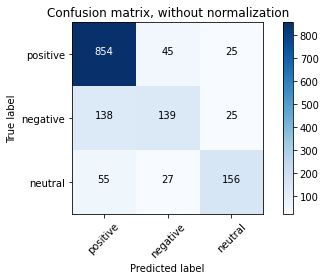

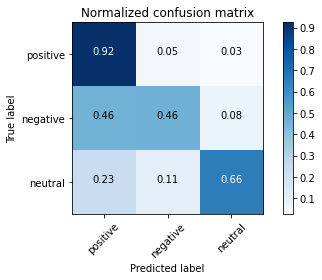

In [139]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['positive','negative','neutral'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ['positive','negative','neutral'], normalize=True,title='Normalized confusion matrix')

plt.show()

In [140]:
import joblib

In [141]:
joblib.dump(model, "tweet_classfier_V1.0.model")

['tweet_classfier_V1.0.model']

In [142]:
model_1 = joblib.load("tweet_classfier_V1.0.model")

In [143]:
model_1.predict(["we have ppl so we need know how many seats are on the next flight. plz put us on standby for people on the next flight?"])

array(['negative'], dtype=object)

In [144]:
model_1.predict(["thank you we got on a different flight to chicago."])

array(['positive'], dtype=object)

In [145]:
model_1.predict(["plus you've added commercials to the experience... tacky."])

array(['negative'], dtype=object)

In [147]:
model_1.predict(["did you know that suicide is the second leading cause of death among teens -24"])

array(['neutral'], dtype=object)

In [151]:
model_1.predict(["I got the worst service!"])

array(['negative'], dtype=object)

In [155]:
model_1.predict(["I love the music"])

array(['positive'], dtype=object)

In [156]:
model_1.predict(["I hate waiting"])

array(['negative'], dtype=object)

Observation : 

In the given tweet project , i used 2 classifier Naive Bayes classifier and Support Vector Machineclassifier

Accuracy of Naive Bayes Classifier is 0.7008196721311475

Accuracy of Support Vector Machine Classifier is 0.8849423193685488

As accuracy score of SVM was more so selected model to find the tweet sentiment.

